# Problem Statement

## BigMart Sales Prediction!
## Sales Prediction for Big Mart Outlets
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
#### Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

#### Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load the Data

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Exploratory Data Analysis

In [5]:
train_df.shape

(8523, 12)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing Values

In [13]:
# Handle missing values without warnings
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])

# Verify that there are no missing values left
print("Missing values after imputation:")
print(train_df.isnull().sum())

Missing values after imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Univariate Analysis - Categorical Features

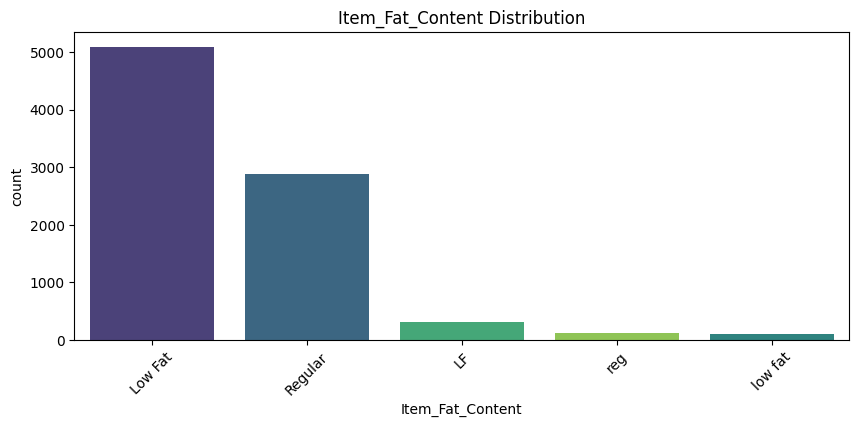

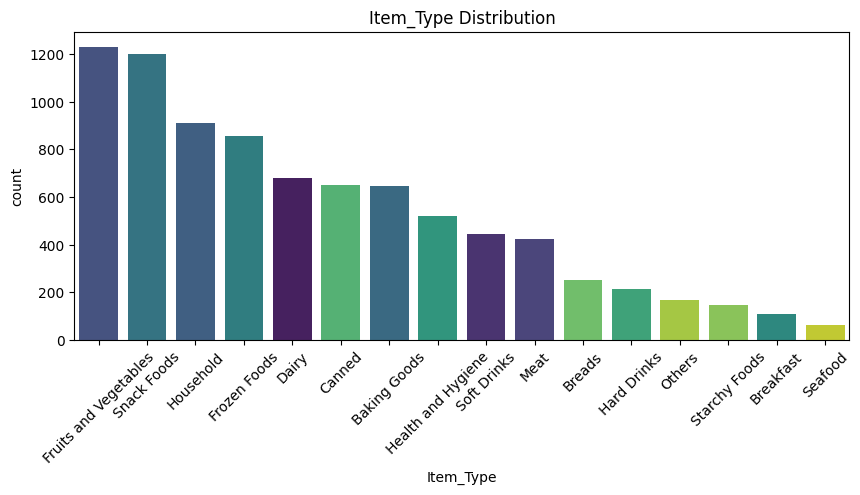

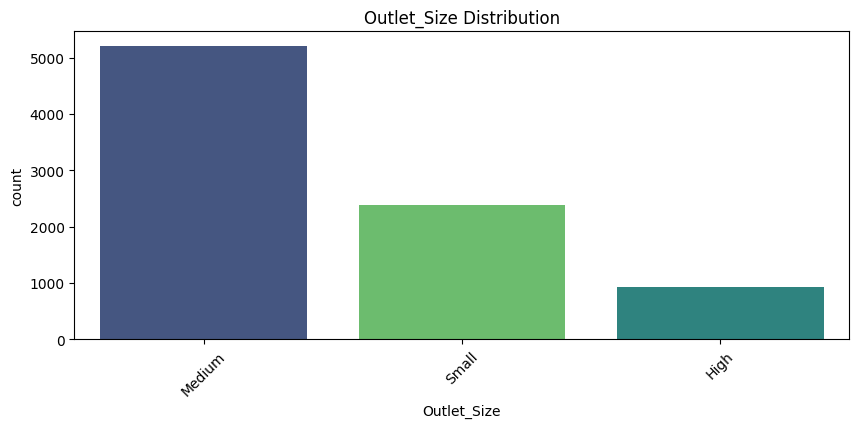

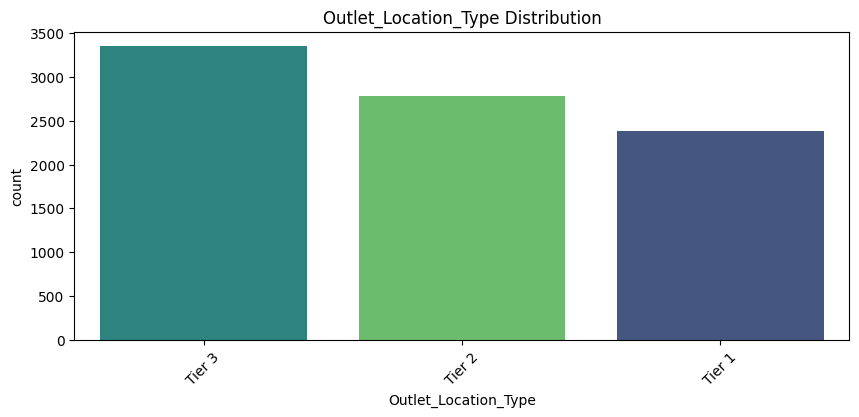

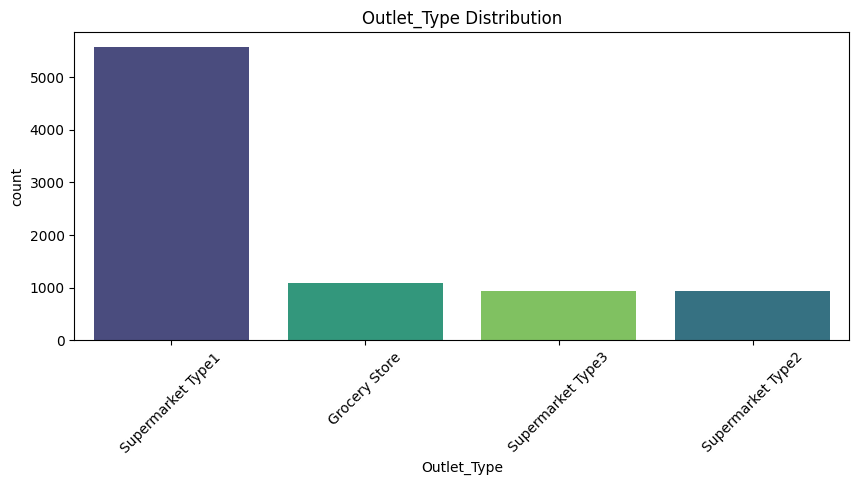

In [24]:
# Define categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Plot distributions for each categorical feature individually
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    plt.title(f"{col} Distribution")
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index, hue=col, palette='viridis', legend=False)
    plt.xticks(rotation=45)
    plt.show()

# Insights from Categorical Feature Distributions

## 1. Item_Fat_Content Distribution
- **Insight**: The majority of items are labeled as "Low Fat" or "Regular".
- **Action**: Ensure consistency in labeling by normalizing "LF" and "low fat" to "Low Fat".

## 2. Item_Type Distribution
- **Insight**: Certain item types, such as "Fruits and Vegetables" and "Snack Foods", are more prevalent.
- **Action**: This indicates a higher variety and frequency of these items in the dataset.

## 3. Outlet_Size Distribution
- **Insight**: "Medium" outlet sizes are more common compared to "Small" or "High".
- **Action**: This suggests that medium-sized outlets are the most typical in the dataset.

## 4. Outlet_Location_Type Distribution
- **Insight**: "Tier 2" location types are more common.
- **Action**: This indicates that a significant number of outlets are located in Tier 2 cities.

## 5. Outlet_Type Distribution
- **Insight**: "Supermarket Type1" outlets are the most prevalent.
- **Action**: This suggests that this type of outlet dominates the dataset.

### Univariate Analysis - Numerical Features

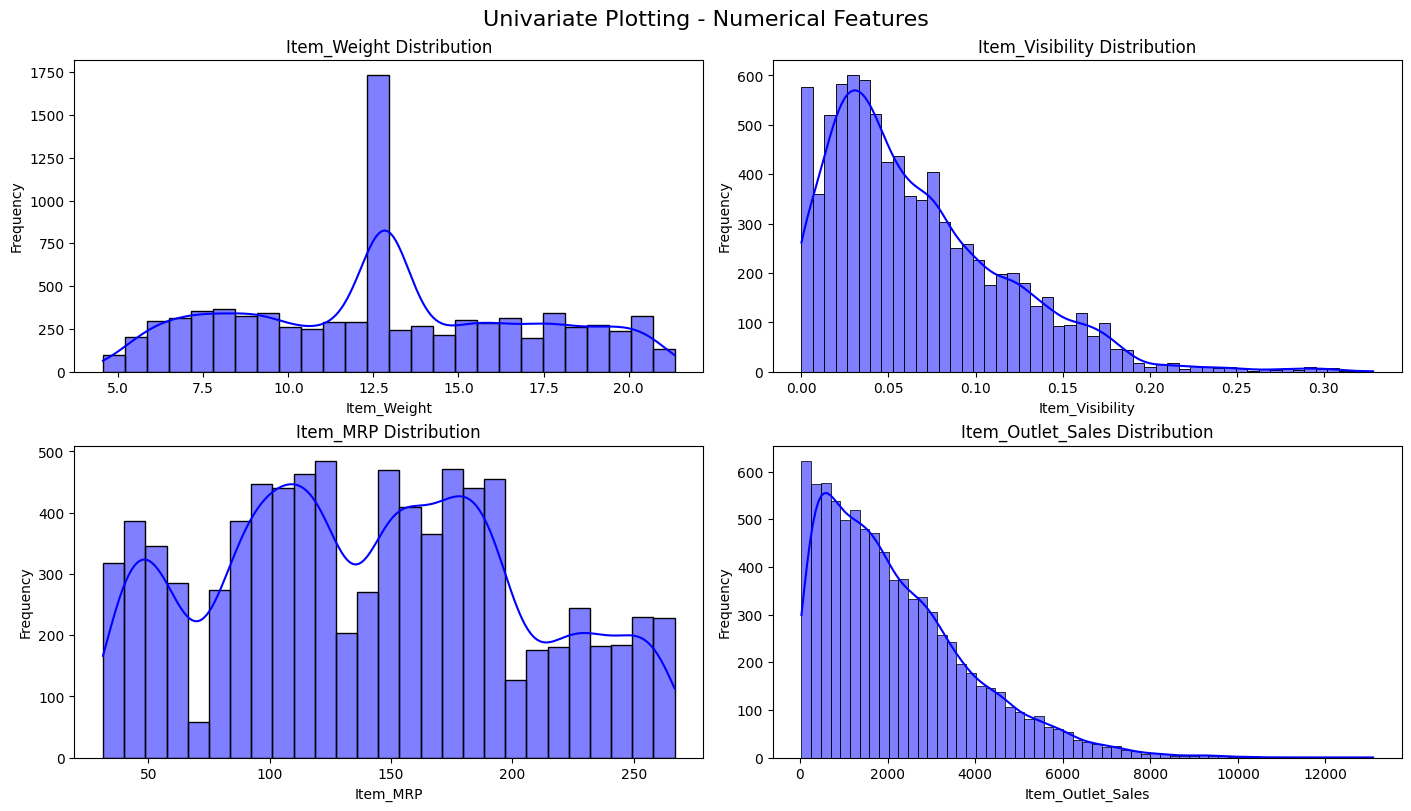

In [25]:
# Define numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Plot distributions
fig, axs = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features", fontsize=16)

for i, col in enumerate(numerical_columns):
    row, col_idx = divmod(i, 2)
    axs[row][col_idx].set_title(f"{col} Distribution")
    sns.histplot(data=train_df, x=col, kde=True, ax=axs[row][col_idx], color='blue')
    axs[row][col_idx].set_xlabel(col)
    axs[row][col_idx].set_ylabel("Frequency")

plt.show()

# Insights from Numerical Feature Distributions

## 1. Item_Weight Distribution
- **Insight**: The distribution of item weights appears to be fairly normal with a slight skew.
- **Action**: Check for any outliers or missing values that might need to be handled.

## 2. Item_Visibility Distribution
- **Insight**: The distribution of item visibility shows a right skew with many items having low visibility.
- **Action**: Consider transforming the data to reduce skewness or handle zero visibility values.

## 3. Item_MRP Distribution
- **Insight**: The distribution of item MRP (Maximum Retail Price) appears to be bimodal.
- **Action**: Investigate the reasons for the bimodal distribution and consider segmenting the data based on MRP ranges.

## 4. Store_Age Distribution
- **Insight**: The distribution of store age shows that most stores are relatively new, with a few older stores.
- **Action**: Consider the impact of store age on sales and whether older stores perform differently from newer ones.

### Bivariate Analysis - Categorical vs Numerical Features

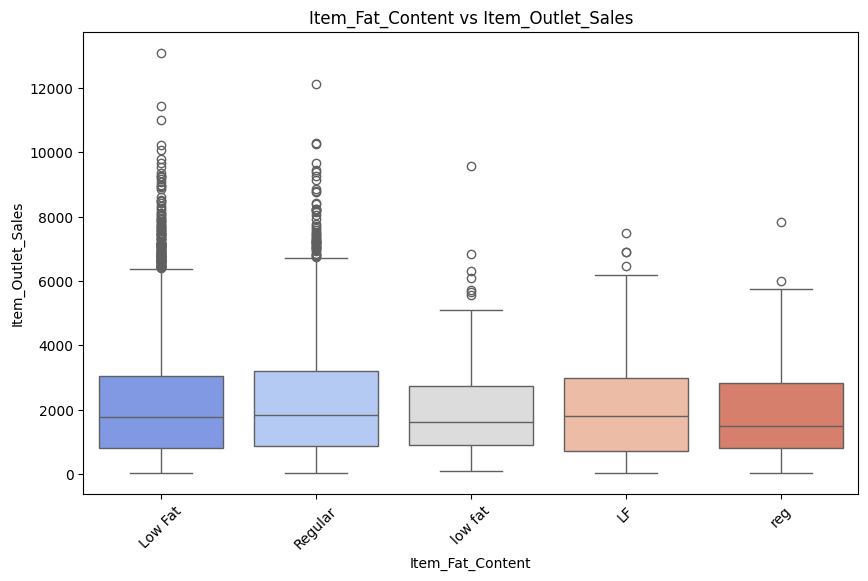

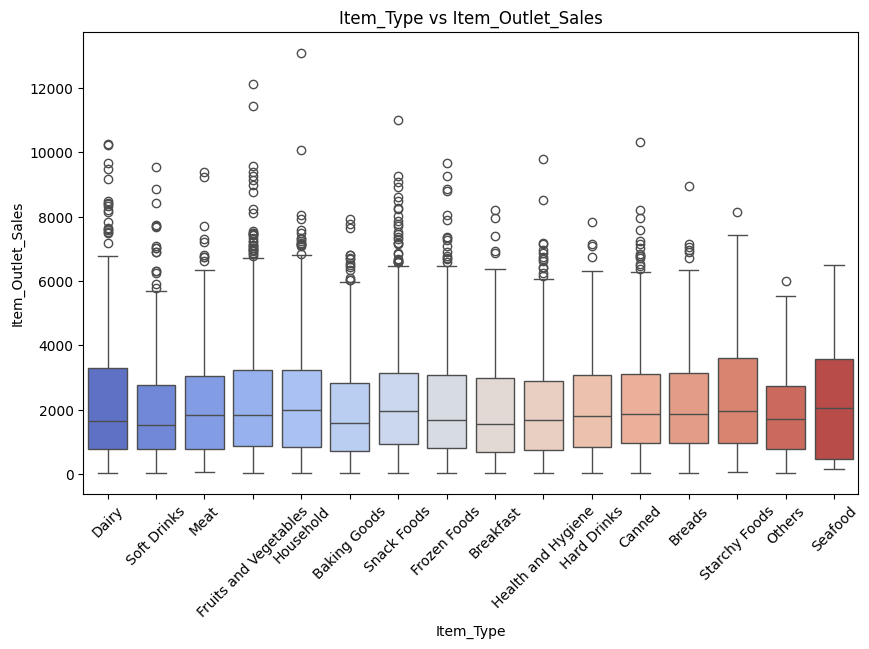

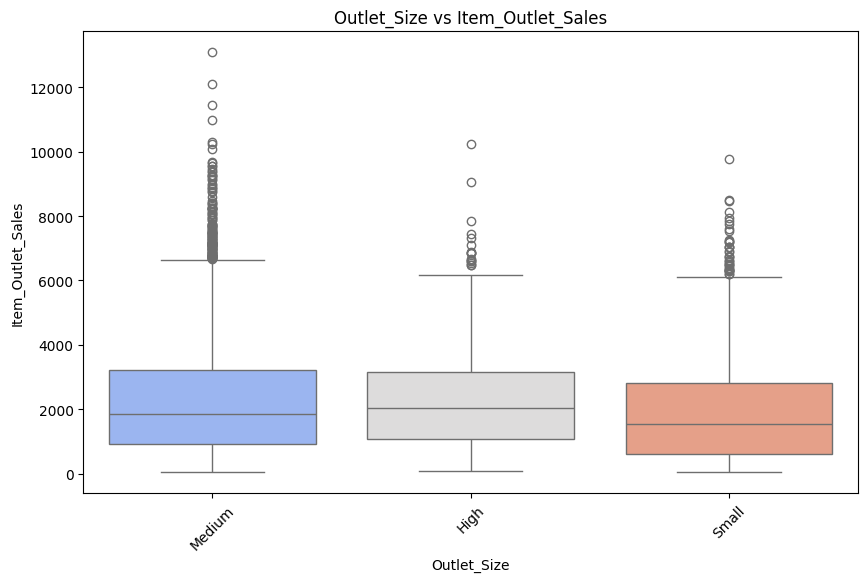

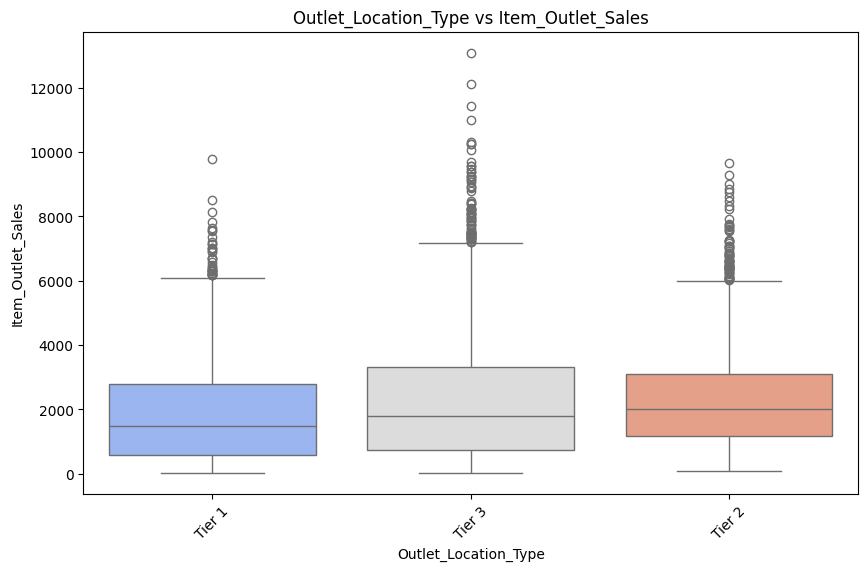

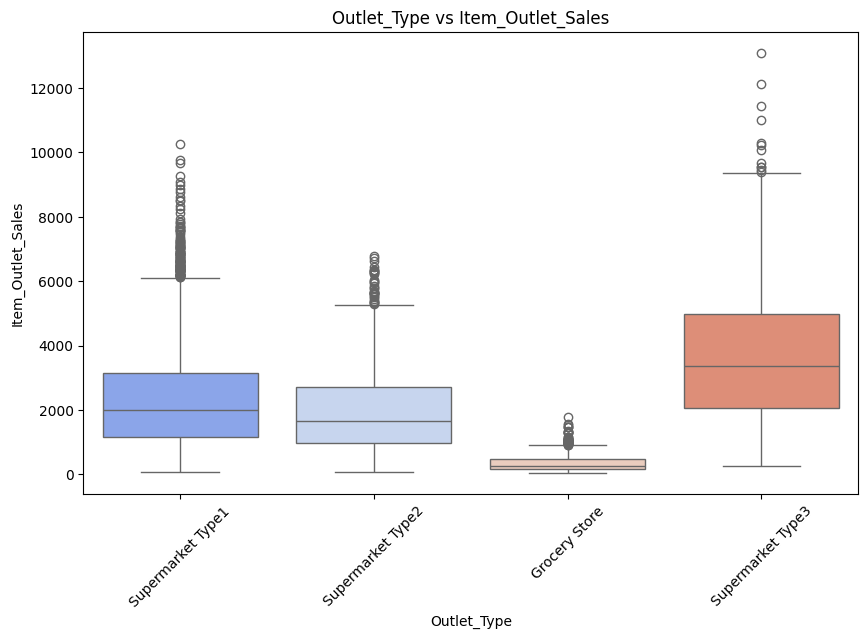

In [28]:
# Define target and categorical columns
target = 'Item_Outlet_Sales'
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Plot relationships for each categorical feature individually
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    plt.title(f"{col} vs {target}")
    sns.boxplot(data=train_df, x=col, y=target, hue=col, palette='coolwarm', legend=False)
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis - Categorical vs Numerical Features

## 1. Item_Fat_Content vs Item_Outlet_Sales
- **Insight**: The boxplot shows the distribution of `Item_Outlet_Sales` for different levels of `Item_Fat_Content`.
- **Action**: Analyze if there is a significant difference in sales between "Low Fat" and "Regular" items.

## 2. Item_Type vs Item_Outlet_Sales
- **Insight**: The boxplot shows the distribution of `Item_Outlet_Sales` for different `Item_Type` categories.
- **Action**: Identify which item types have higher sales and consider focusing on those categories.

## 3. Outlet_Size vs Item_Outlet_Sales
- **Insight**: The boxplot shows the distribution of `Item_Outlet_Sales` for different `Outlet_Size` categories.
- **Action**: Determine if outlet size impacts sales and consider strategies for different outlet sizes.

## 4. Outlet_Location_Type vs Item_Outlet_Sales
- **Insight**: The boxplot shows the distribution of `Item_Outlet_Sales` for different `Outlet_Location_Type` categories.
- **Action**: Analyze if location type affects sales and consider location-specific strategies.

## 5. Outlet_Type vs Item_Outlet_Sales
- **Insight**: The boxplot shows the distribution of `Item_Outlet_Sales` for different `Outlet_Type` categories.
- **Action**: Identify which outlet types have higher sales and consider focusing on those outlet types.

### Bivariate Analysis - Numerical vs Numerical Features

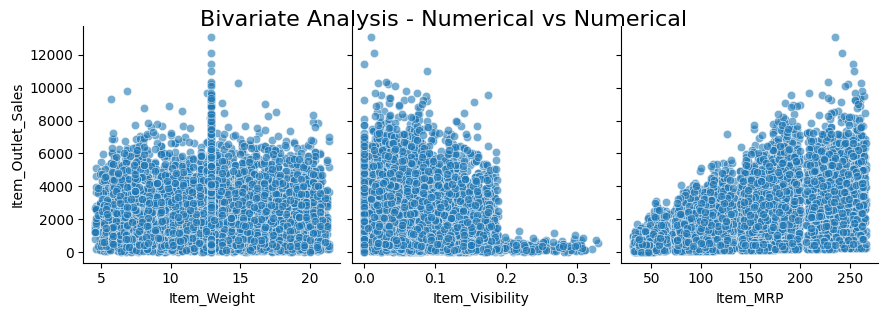

In [29]:
# Pairplot for numerical columns against the target
sns.pairplot(data=train_df, x_vars=numerical_columns[:-1], y_vars=target, height=3, aspect=1, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Bivariate Analysis - Numerical vs Numerical", y=1.02, fontsize=16)
plt.show()


# Bivariate Analysis - Numerical vs Numerical Features

## 1. Item_Weight vs Item_Outlet_Sales
- **Insight**: The scatter plot shows the relationship between `Item_Weight` and `Item_Outlet_Sales`.
- **Action**: Analyze if there is a correlation between item weight and sales. Consider handling any outliers.

## 2. Item_Visibility vs Item_Outlet_Sales
- **Insight**: The scatter plot shows the relationship between `Item_Visibility` and `Item_Outlet_Sales`.
- **Action**: Investigate the impact of item visibility on sales. Consider transforming the data to reduce skewness.

## 3. Item_MRP vs Item_Outlet_Sales
- **Insight**: The scatter plot shows the relationship between `Item_MRP` (Maximum Retail Price) and `Item_Outlet_Sales`.
- **Action**: Identify if higher MRP items have higher sales. Consider segmenting the data based on MRP ranges.

In [31]:
# Define target and features
target = 'Item_Outlet_Sales'
features = [col for col in train_df.columns if col != target]

In [36]:
# Split the data into inputs (X) and output (y)
X = train_df[features]
y = train_df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preparation: Data Cleaning and Feature Engineering
def preprocess_data(df):
    # Handle missing values
    df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
    df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')
    
    # Normalize Item_Fat_Content
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
        'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg': 'Regular'
    })
    
    # Calculate store age
    current_year = 2024
    df['Store_Age'] = current_year - df['Outlet_Establishment_Year']
    
    return df

In [55]:
# Clean and preprocess the training data
X_train_cleaned = preprocess_data(X_train.copy())
X_test_cleaned = preprocess_data(X_test.copy())
test_df_cleaned = preprocess_data(test_df.copy())

In [56]:
# Define categorical and numerical columns
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Store_Age']

In [57]:
# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [58]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0)
}

In [59]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Create a pipeline that first transforms the data and then fits the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Fit the model
    pipeline.fit(X_train_cleaned, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test_cleaned)
    
    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"{name} Performance:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}\n")

Linear Regression Performance:
RMSE: 1069.365350629999
MAE: 792.0250358932378
R2 Score: 0.5792660606628826

KNN Performance:
RMSE: 1160.253738771836
MAE: 821.9579425454546
R2 Score: 0.5047080338122583

Decision Tree Performance:
RMSE: 1481.8052225541114
MAE: 1018.2081352492669
R2 Score: 0.1921372701790406

Random Forest Performance:
RMSE: 1084.7449232615993
MAE: 757.1851385196479
R2 Score: 0.56707707601559

XGBoost Performance:
RMSE: 1062.8661021164512
MAE: 733.224026558592
R2 Score: 0.5843646827080666

CatBoost Performance:
RMSE: 1025.7961334534173
MAE: 717.7277470013582
R2 Score: 0.612851620283732



In [60]:
# Compare model performance
performance_df = pd.DataFrame(results).T
print(performance_df)

                          RMSE          MAE        R2
Linear Regression  1069.365351   792.025036  0.579266
KNN                1160.253739   821.957943  0.504708
Decision Tree      1481.805223  1018.208135  0.192137
Random Forest      1084.744923   757.185139  0.567077
XGBoost            1062.866102   733.224027  0.584365
CatBoost           1025.796133   717.727747  0.612852


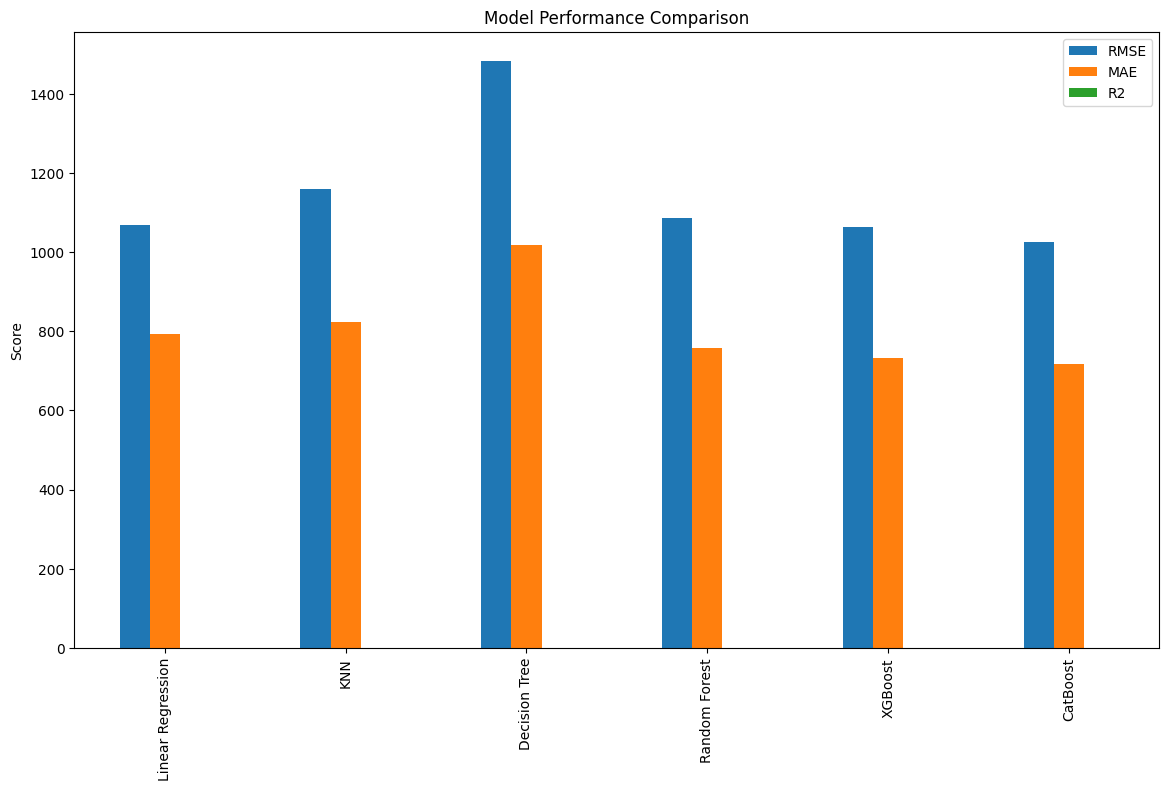

In [61]:
# Plot model performance
performance_df.plot(kind='bar', figsize=(14, 8), title="Model Performance Comparison")
plt.ylabel("Score")
plt.show()

In [62]:
# Create submission files for all models
sample_submission = pd.read_csv('data/sample_submission.csv')

for name, model in models.items():
    # Create a pipeline that first transforms the data and then fits the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Fit the model on the entire training data
    pipeline.fit(X_train_cleaned, y_train)
    
    # Predict on the test data
    test_predictions = pipeline.predict(test_df_cleaned)
    
    # Ensure no negative values in predictions
    test_predictions = np.maximum(test_predictions, 0)
    
    # Create submission file
    submission = sample_submission.copy()
    submission['Item_Outlet_Sales'] = test_predictions
    submission_file = f'{name.lower().replace(" ", "_")}_submission.csv'
    submission.to_csv(submission_file, index=False)
    print(f"Submission file created: {submission_file}")

Submission file created: linear_regression_submission.csv
Submission file created: knn_submission.csv
Submission file created: decision_tree_submission.csv
Submission file created: random_forest_submission.csv
Submission file created: xgboost_submission.csv
Submission file created: catboost_submission.csv
